In [5]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets.reuters import load_data, get_word_index #type: ignore

from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding #type: ignore

from tensorflow.keras.utils import to_categorical #type: ignore

from tensorflow.keras.preprocessing import sequence #type: ignore 

from tensorflow.keras.optimizers import Adam, RMSprop, SGD #type: ignore

warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
import nltk

nltk.download("reuters")
nltk.download("punkt")

from nltk.corpus import reuters

documentos = reuters.fileids()

texto_original = reuters.raw(documentos[0])

print("Texto orignal del primer documento: ")
print(texto_original)

Texto orignal del primer documento: 
ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
  s

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
print("Ejemplo de una noticia en forma de indicies: ")
documentos[0:100]

Ejemplo de una noticia en forma de indicies: 


['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [8]:
n_words = 1000

(X_train, y_train), (X_test, y_test) = load_data(num_words=n_words, test_split=0.3)

n_train_size = X_train.shape[0]

print("-" * 50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print(""*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-" * 50)

n_train_size

--------------------------------------------------
Training data X shape: (7859,)
Training data y shape: (7859,)

Test data X shape: (3369,)
Test data y shape: (3369,)
--------------------------------------------------


7859

In [9]:
print("Ejemplo de una noticia en formato de indices: ")
print(X_train[0])

Ejemplo de una noticia en formato de indices: 
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [10]:
n_cat = pd.Series(y_train).nunique()

n_cat

46

In [11]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [12]:
my_dict = get_word_index()
my_dict_inv = {v:k for k,v in my_dict.items()}
print(my_dict_inv.get(90, "No existe en el diccionario"))

april


In [13]:
n_cat = pd.Series(y_train).nunique()

n_cat

46

In [14]:
print("Ejemplo de una noticia en formatos de indices:")
print(y_train[0:100])

Ejemplo de una noticia en formatos de indices:
[ 3  4  3  4  4  4  4  3  3 16  3  3  4  4 19  8 16  3  3 21 11  4  4  3
  3  1  3  1  3 16  1  4 13 20  1  4  4 11  3  3  3 11 16  4  4 20 18 25
 19  3  4  3  4  3  4  3  3  4  4  3  4  4  3 19 35  8  4  4  3 16 25  3
 11  3  9 16 38 10  4  4  9  3  3 28 20  3  3  3  3  3  4  4  3  4  2  3
  1  3 19  4]


In [15]:
categorias_unicas = np.unique(y_train)

print("Categorias unicas en y_train:")
print(categorias_unicas)
print(f"Categorias unicas en la primera noticia {y_train[0]}")

Categorias unicas en y_train:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Categorias unicas en la primera noticia 3


In [16]:
my_dict = get_word_index(path="reuters_word_index.json")

In [17]:
my_dict

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [18]:
sorted_dict = dict(sorted(my_dict.items(), key=lambda item: item[1]))

list(sorted_dict.items())[0:200]

[('the', 1),
 ('of', 2),
 ('to', 3),
 ('in', 4),
 ('said', 5),
 ('and', 6),
 ('a', 7),
 ('mln', 8),
 ('3', 9),
 ('for', 10),
 ('vs', 11),
 ('dlrs', 12),
 ('it', 13),
 ('reuter', 14),
 ('000', 15),
 ('1', 16),
 ('pct', 17),
 ('on', 18),
 ('from', 19),
 ('is', 20),
 ('that', 21),
 ('its', 22),
 ('cts', 23),
 ('by', 24),
 ('at', 25),
 ('year', 26),
 ('be', 27),
 ('with', 28),
 ('2', 29),
 ('will', 30),
 ('was', 31),
 ('billion', 32),
 ('he', 33),
 ('u', 34),
 ('s', 35),
 ('net', 36),
 ('has', 37),
 ('would', 38),
 ('an', 39),
 ('as', 40),
 ('5', 41),
 ('not', 42),
 ('loss', 43),
 ('4', 44),
 ('1986', 45),
 ('company', 46),
 ('which', 47),
 ('but', 48),
 ('this', 49),
 ('shr', 50),
 ('last', 51),
 ('are', 52),
 ('lt', 53),
 ('have', 54),
 ('or', 55),
 ('6', 56),
 ('bank', 57),
 ('7', 58),
 ('were', 59),
 ('8', 60),
 ('had', 61),
 ('oil', 62),
 ('trade', 63),
 ('share', 64),
 ('one', 65),
 ('about', 66),
 ('0', 67),
 ('inc', 68),
 ('9', 69),
 ('new', 70),
 ('profit', 71),
 ('also', 72),
 ('

In [19]:
my_dict_inv = {v:k for k,v in my_dict.items()}

In [20]:
i_news = 0

news = list(pd.Series(X_train[i_news]).apply(lambda x: my_dict_inv[x]))

print(' '.join(news))

the of of mln loss for plc said at only ended said of could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 of of several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed of april 0 are 2 states will billion total and against 000 pct dlrs


In [21]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [22]:
y = np.concatenate([y_train, y_test], axis=0)

y = to_categorical(y, 46)

y_train = y[:n_train_size, :]
y_test = y[n_train_size:, :]

In [23]:
print(y_test)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
n_neurons = 100

n_input = 100

In [25]:
my_model = Sequential()

my_model.add(Embedding(n_words, n_input, input_length=1000))

my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))

my_model.add(Dense(n_cat, activation='softmax'))

In [26]:
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
import tensorflow as tf

my_model = Sequential()

my_model.add(Embedding(input_dim=n_words, output_dim=n_input, input_length=100))

my_model.add(LSTM(units=n_neurons, return_sequences=False, activation='tanh'))

my_model.add(Dense(n_cat, activation='softmax'))

my_model.build(input_shape=(None, 100))

my_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │         4,646 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,046 (722.84 KB)

 Trainable params: 185,046 (722.84 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
n_epochs = 20
batch_size = 20
learning_rate = 0.001

In [29]:
my_optimizer = Adam(learning_rate=learning_rate)

my_model.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['accuracy']
)

In [30]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

with tf.device('/GPU:0'):
        my_summary = my_model.fit(
        X_train, 
        y_train,
        epochs=n_epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=1  
    )

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.3644 - loss: 2.5711 - val_accuracy: 0.4924 - val_loss: 2.0126
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.4776 - loss: 2.0260 - val_accuracy: 0.5172 - val_loss: 1.8640
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.5454 - loss: 1.8157 - val_accuracy: 0.5827 - val_loss: 1.6570
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.5773 - loss: 1.6739 - val_accuracy: 0.5999 - val_loss: 1.5704
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.6031 - loss: 1.5416 - val_accuracy: 0.6272 - val_loss: 1.4706
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.6339 - loss: 1.4272 - val_accuracy: 0.6469 - val_loss: 1.3925
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.6734 - loss: 1.2994 - val_accuracy: 0.6826 - val_loss: 1.3143
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7082 - loss: 1.1490 - 

In [31]:
# Con cpu
# my_summary = my_model.fit(
#     X_train, 
#     y_train,
#     epochs=n_epochs,
#     batch_size=batch_size,
#     validation_split=0.2,
#     verbose=1  
# )

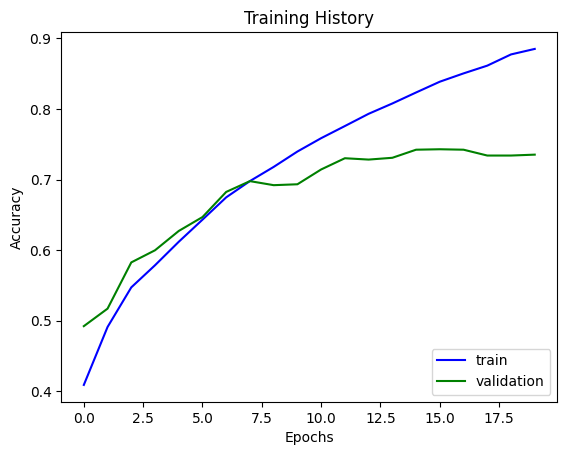

In [32]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")

plt.title("Training History")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.legend(["train", "validation"], loc="lower right")
plt.show()

In [33]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]

print("Test Accuracy: {}".format(np.round(ACC, 3)))

Test Accuracy: 0.714
